# Exercise 1. Waiting time

![picture 2](images/943113cf94c15371588eae88a0f24f70016016863a21b63ac2652b4359d226b5.png)  



	Shapiro-Wilk normality test

data:  x
W = 0.93473, p-value = 0.3207


png 
  3

png 
  2

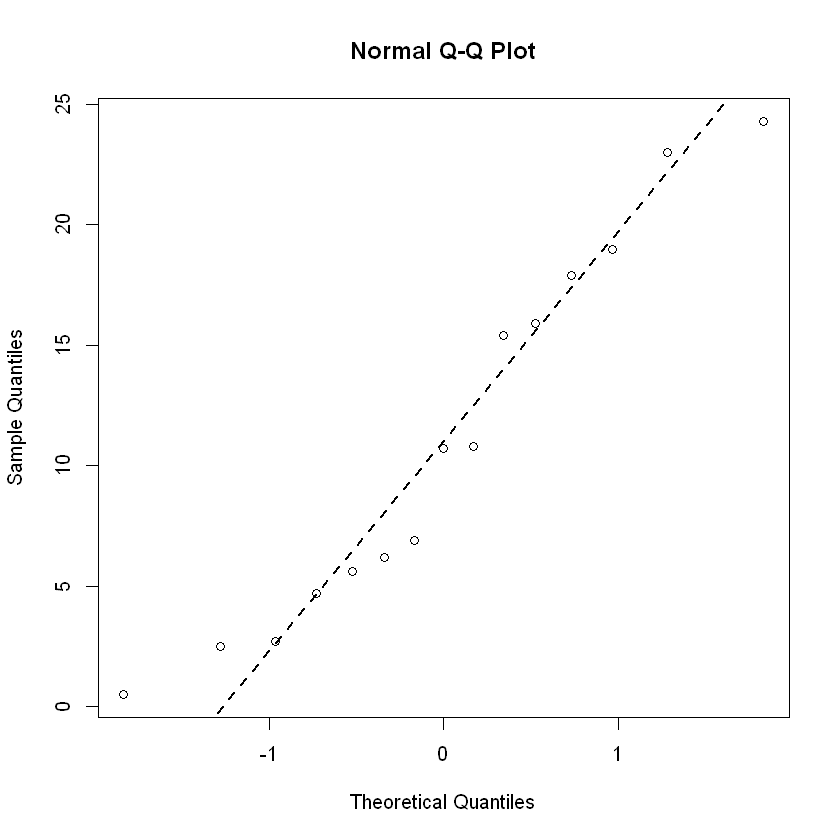

In [11]:
x <- c(15.4, 17.9, 19.0, 0.5, 15.9, 2.7, 6.2, 2.5, 4.7, 6.9, 10.8, 24.3, 5.6, 23.0, 10.7) # nolint
mean_wait <- mean(x)
sd_wait <- sd(x)
len_wait <- length(x)

# Check for normality
qqnorm(x) ; qqline(x, col = 1,lwd=2,lty=2) ; shapiro.test(x)
dev.copy(png,'plots/1a_qqnorm.png')
dev.off()

#### The data seems to follow a normal distribution, gathered from the qqline and the shapiro test results (p > 0.05)
#### Now we first calculate the confidence interval via a third party package:

In [13]:
# install.packages("Rmisc")
# library(Rmisc)
confidence_interval <- CI(x, 0.97)
confidence_interval

package 'Rmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unni\AppData\Local\Temp\RtmpCouLVp\downloaded_packages


Warning message:
"package 'Rmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: plyr


upper      mean     lower 
15.891642 11.073333  6.255024

#### And then calculate it normally:

In [14]:
# First we calculate the CI normally:
error <- qt(0.985, df = len_wait - 1) * sd_wait / sqrt(len_wait)
lower <- mean_wait - error
upper <- mean_wait + error
upper; mean_wait; lower

[1] 15.89164

[1] 11.07333

[1] 6.255024

#### Now for the bootstrap method:

In [21]:
iter <- 1000
waits <- numeric(iter)
for(iter in 1:iter) {
    wait <- sample(x, replace=T)
    waits[iter] <- mean(wait)}

waits_015 <- quantile(waits, 0.015)
waits_985 <- quantile(waits, 0.985)
2 * mean_wait - waits_015; mean_wait; 2 * mean_wait - waits_985

1.5% 
15.01047

[1] 11.07333

98.5% 
6.6395

#### Now let's calculate the sample size needed for a maximum 97%-CI length of 2:

In [28]:
# The formula is this:
minimum_n <- (waits_015 ** 2 * sd_wait **2) / error ** 2
minimum_n

1.5% 
130.9869

#### We a need minimum of 131 samples

#### So clearly the bootstrap method performs very similar to the direct confidence interval calculation. Increasing the amount of iterations seemed to bring the results closer to the earlier confidence interval we calculated.

![picture 3](images/47e31fdccd701f461b621397da394b394c82f51183ea2bf986e1d1c0c0bc48ac.png)  
